In [1]:
#imprting the necessary libraries 
import io
from io import StringIO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import pandas as pd
# Import the dataset
df = pd.read_csv("student_scores.csv")
#df.head()
df.head()
#calculer la moyenne des etudiants en fnctins des heures d'etude

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Shape of dataset
print("Shape of Training dataset:", df.shape)


Shape of Training dataset: (25, 2)


In [4]:
# Information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Describe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


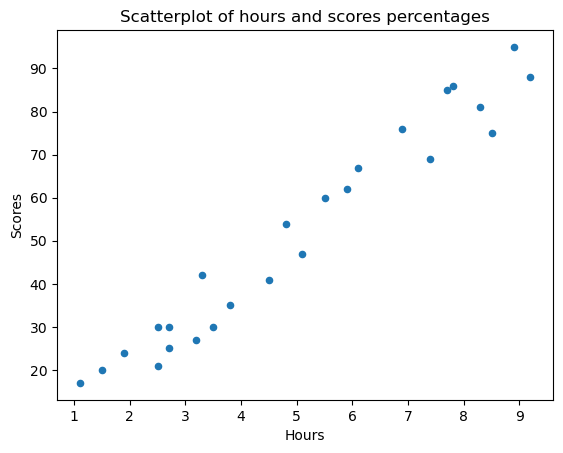

In [6]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

#nchoufou esq lineairement eparee sinon 
#mn9drouch nutilisiw regression lineaire, hna rah lineairement separee psq rah une droite

In [7]:
X = df.iloc[:,0:1]
X = np.nan_to_num(X)
# -1 means last column
Y = df.iloc[:,-1]


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


To dig further into what is happening to our model, we can look at a metric that measures the model in a different way, it doesn't consider our individual data values such as MSE, RMSE and MAE, but takes a more general approach to the error, the R² 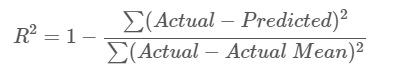



In [9]:
#R2 : nuvelle meure pourcalculer l'erreur et elle est plus generale 3la MSE..
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train) 
y_pred = model.predict(x_train)
print('train R2', model.score(x_train,y_train))
print('test R2', model.score(x_test,y_test))


train R2 0.9515510725211552
test R2 0.9454906892105356


In [10]:
#Coefficients
print(model.intercept_)#-->b
print(model.coef_)
#ax+b

2.018160041434683
[9.91065648]


In [11]:
from sklearn.metrics import mean_squared_error
print('mean squared error for training set', mean_squared_error(y_train, model.predict(x_train)))
print('mean squared error for test set', mean_squared_error(y_test, model.predict(x_test)))

mean squared error for training set 30.89818237731452
mean squared error for test set 21.5987693072174


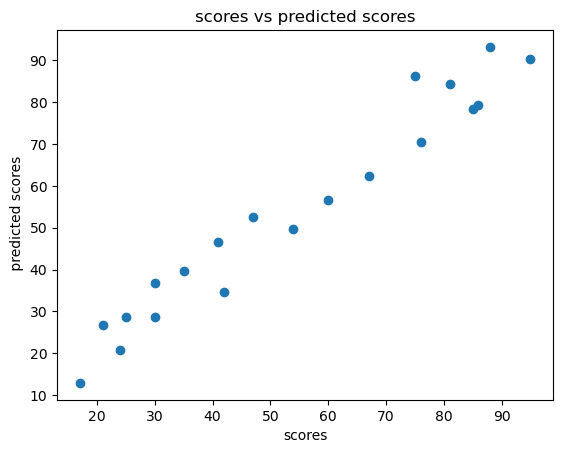

In [12]:
#Visualizing the difference between actual and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_train,model.predict(x_train))
plt.xlabel("scores")
plt.ylabel(" predicted scores")
plt.title("scores vs predicted scores")
plt.show()

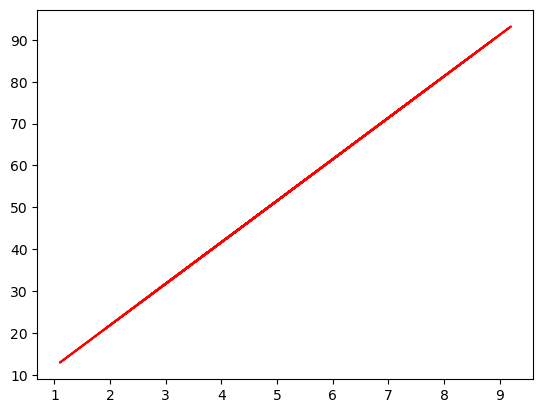

In [13]:
#question3:draw line
#f(x)=slope*X+intercept

import pandas as pd
import numpy as np

def predict(x):
         intercept=model.intercept_
         slope=model.coef_
         return slope * x + intercept
fitLine = predict(x_train)
plt.plot(x_train, fitLine, c='r')




In [14]:
df = pd.read_csv("../TP2-ML/dataset/HousingData.csv")
df=pd.DataFrame(df).fillna(df.mean())
#df.head()
df.head()
df.shape

(506, 14)

In [1]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,0:13]
X = np.nan_to_num(X)
# -1 means last column
Y = df.iloc[:,-1]
#X = scale(X) 
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
x_train.shape



NameError: name 'df' is not defined

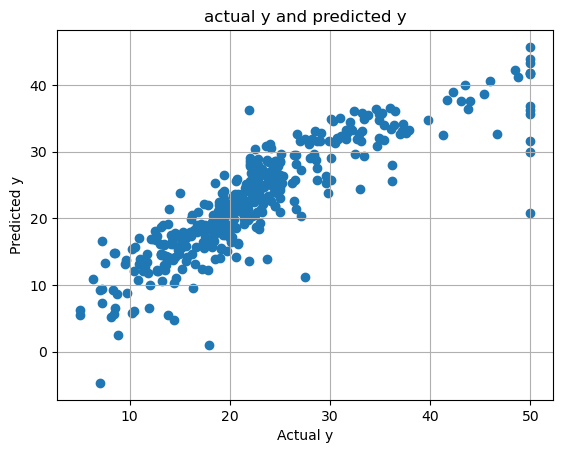

Squared Error : 36.375217957238306


In [16]:
#SGDRegrosser algorithm execution (qst 4)
model = SGDRegressor()
model.fit(x_train, y_train)
plt.scatter(y_train, model.predict(x_train))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('actual y and predicted y')
plt.show()
print('Squared Error :', mean_squared_error(y_test, model.predict(x_test)))

In [17]:
#we will start by creating our cost function 
# as y=beta+theta*x;beta-->bias,theta-->weight
#first we initialize the bias and weights randomly
import random 
def initialize(dim):
    beta=random.random()
    theta=np.random.rand(dim)
    
    return beta,theta
beta,theta=initialize(13)
print('Bias: ',beta,'Weights: ',theta)

Bias:  0.9791762238361311 Weights:  [0.34864347 0.25169242 0.91142771 0.35025071 0.76042674 0.7652543
 0.96584099 0.61616639 0.01066304 0.50159838 0.08929815 0.29380681
 0.93635628]


In [18]:
def y_predict(beta,theta,X):
    return beta + np.dot(X,theta)

y_pred=y_predict(beta,theta,x_test)
print('pred:',y_pred[0:10])
print('test:',y_test[0:10])
print(y_pred.shape)
print(x_test.shape)


pred: [-3.08165839  3.17181545  2.13554484  4.75273992 -0.12543712 -1.22853556
  1.59756696 -1.6614145  -2.74916665 -0.71878761]
test: 329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
15     19.9
487    20.6
340    18.7
310    16.1
102    18.6
Name: MEDV, dtype: float64
(102,)
(102, 13)


In [19]:
#we now will calculate the cost function which is the difference between the predicted and actual y(results)
import math
def get_cost(y_test,y_pred):
    Y_resd=abs(y_test-y_pred)
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(y_test-Y_resd)
y_pred=y_predict(beta,theta,x_test)
get_cost(y_test,y_pred)

558.9842430806374

In [20]:
    #To get the updated bias and weights 
    #x,y : x_test,y_test
    #y_pred: predicted value with current bias and weights
    #beta_0,theta_0: current bias and weights
    #Learning rate: learning rate to adjust the update step
    def update_theta(x,y,y_pred,beta_0,theta_o,learning_rate):
        db=(np.sum(y_pred-y)*2)/len(y)
        dw=(np.dot((y_pred-y),x)*2)/len(y)
        beta_1=beta_0-learning_rate*db
        theta_1=theta_o-learning_rate*dw
        return beta_1,theta_1
        #print("After initialization -Bias: ",beta_1,"theta: ",theta_1)
    #y_pred=y_predict(beta,theta,x_test)
    beta,theta=update_theta(x_test,y_test,y_pred,beta,theta,0.01)
    #print("After first update -Bias: ",beta,"theta: ",theta)
    y_pred=y_predict(beta,theta,x_test)
    get_cost(y_test,y_pred)
    #better and more optimal learning rate.

532.3058351142009

In [21]:
#the main gradient descent function that will find optimal bias and weights
def run_gradient_descent(X,Y,alpha,num_iterations):
    beta,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for eachiter_ in range(num_iterations):
        #print(eachiter_)
        y_pred=y_predict(beta,theta,X)
        this_cost=get_cost(Y,y_pred)
        prev_beta=beta
        prev_theta=theta
        beta,theta=update_theta(X,Y,y_pred,prev_beta,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
            
        iter_num +=1
    print('Final Estimate of beta and theta :',beta,theta)
    return gd_iterations_df,beta,theta
gd_iterations_df,beta,theta=run_gradient_descent(x_test,y_test,alpha=0.01,num_iterations=200)


Final Estimate of beta and theta : 21.75215243224563 [-0.31849342 -0.78408147 -0.18696106  1.40016519 -1.28137355  3.23918008
 -0.1387173  -1.2115152   1.63425878  1.15812784 -1.15928255  1.56639045
 -4.60436409]


In [22]:
gd_iterations_df[0:10]


,iteration,cost
0,0.0,589.041372
1,10.0,385.399249
2,20.0,264.292971
3,30.0,185.650411
4,40.0,133.880101
5,50.0,99.624901
6,60.0,76.860443
7,70.0,61.663111
8,80.0,51.466119
9,90.0,44.584587


Text(0, 0.5, 'Cost')

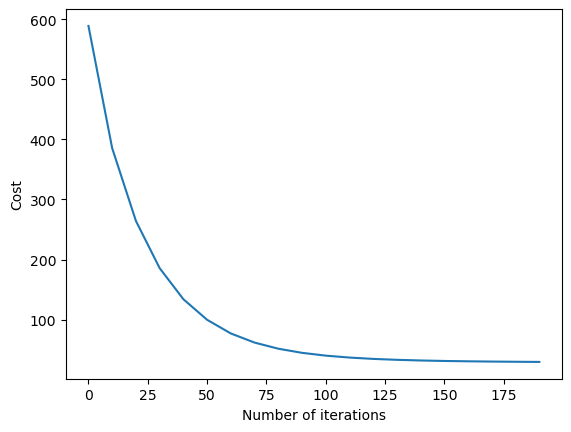

In [23]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

Final Estimate of beta and theta : 22.532806287656943 [-0.89331105  0.85256496 -0.42099712  0.78876768 -1.84421245  2.93392831
 -0.32234658 -3.08031512  1.84470769 -1.25854945 -1.97767857  0.85062816
 -3.25356913]
Final Estimate of beta and theta : 19.571490080320356 [-0.65699183  0.74018961 -0.55544717  0.92397534 -0.23967277  3.4665214
 -0.35545995 -1.28295884  0.55000155 -0.71826727 -1.41501491  1.09738263
 -2.38489989]
Final Estimate of beta and theta : 4.190534682572987 [-0.38050245  0.96880342 -0.44871699  0.73802298  0.27247212  1.12481176
 -0.20833798  0.70423799 -0.37825232  0.12726773 -0.31760056  0.58750815
 -0.4292884 ]
Final Estimate of beta and theta : 22.532806324110663 [-0.94389559  0.9260692  -0.26259542  0.76166828 -1.93926536  2.88442066
 -0.29169548 -3.13585235  2.33846746 -1.78218325 -2.00850984  0.85237589
 -3.25763324]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

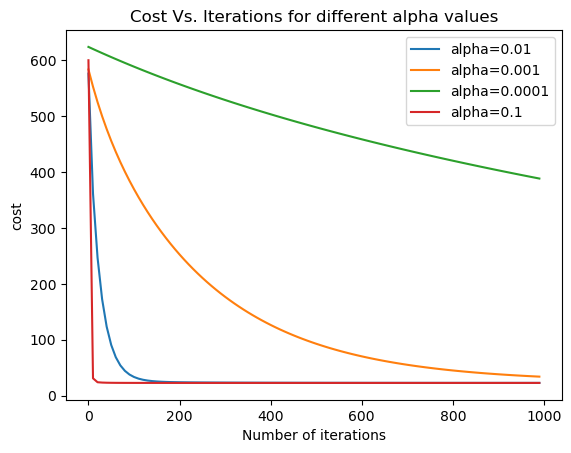

In [24]:
#variate learning rate
alpha_df_1,beta,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=1000)
alpha_df_2,beta,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=1000)
alpha_df_3,beta,theta=run_gradient_descent(X,Y,alpha=0.0001,num_iterations=1000)
alpha_df_4,beta,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=1000)

plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.01')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.001')
plt.plot(alpha_df_3['iteration'],alpha_df_3['cost'],label='alpha=0.0001')
plt.plot(alpha_df_4['iteration'],alpha_df_4['cost'],label='alpha=0.1')

plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')
#0.01 is the more optimal learning rate as it converges much quicker than 0.001and 0.0001.

Final Estimate of beta and theta : 22.640257451637794 [-0.50372192  0.79215156 -0.26950125  1.20133135 -1.66352227  3.12397014
  0.32079674 -2.97915378  3.76750374 -1.62205335 -1.15638526  1.73891677
 -4.69818167]


Text(0, 0.5, 'Cost')

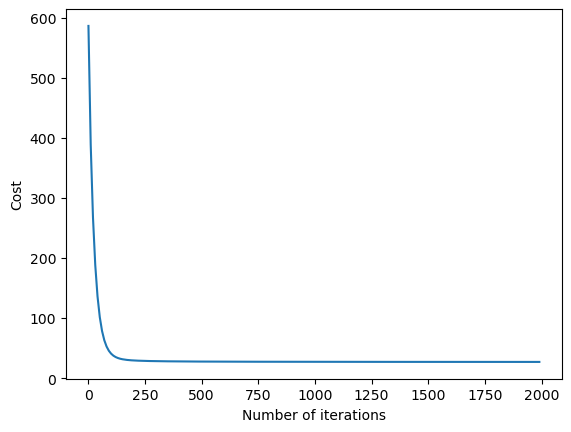

In [25]:
#nbr of iterations 2000
gd_iterations_df,beta,theta=run_gradient_descent(x_test,y_test,alpha=0.01,num_iterations=2000)
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


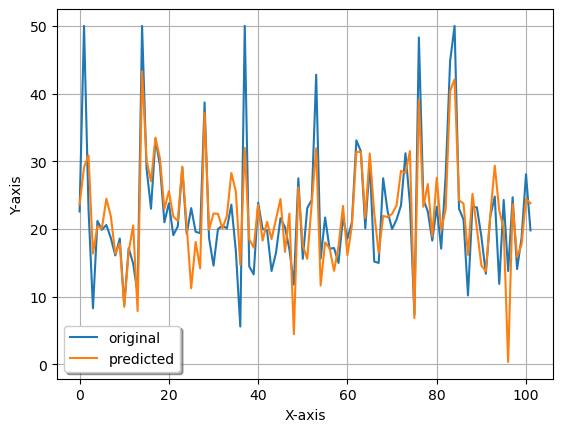

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: MEDV, Length: 102, dtype: float64
[23.58305254 29.1470027  30.87479089 16.39534037 20.42888397 20.10905189
 24.48896872 21.90236888 16.34698737 17.88336842  8.50890822 16.65418403
 20.53279026  7.8903086  43.30224433 30.19769418 27.05452129 33.49859498
 30.44763444 22.97301735 25.59024887 21.84015573 21.20987448 29.21958979
 20.47918648 11.25049515 18.09680001 14.19991117 37.20069594 19.91091436
 22.29562123 22.25508465 20.09355747 21.97237388 28.28567291 25.56539524
 14.73436632 31.98199107 18.49881605 17.2712733  23.59335464 18.29298353
 21.07313927 18.50836152 21.44993725 24.43623458 16.64158249 22.28570924
  4.47975108 26.15555539 17.57130447 15.60344791 23.83785686 31.9259862
 11.67443306 18.01916397 17.17952019 13.83254206 17.45450986 23.41791554
 16.11798931 20.50684041 31.39746783 31.40004229 21.64350773 31.16820353
 22.39190526 16.42165257 2

In [30]:
#question 6
x_axis = range(len(y_test))
beta= 22.640257451637794 
theta= [-0.50372192, 0.79215156, -0.26950125, 1.20133135, -1.66352227, 3.12397014,
  0.32079674, -2.97915378,  3.76750374, -1.62205335, -1.15638526,  1.73891677,
 -4.69818167]
y_pred=y_predict(beta,theta,x_test)
plt.plot(x_axis, y_test, label="original")
plt.plot(x_axis, y_pred, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
print(y_test)
print(y_pred)

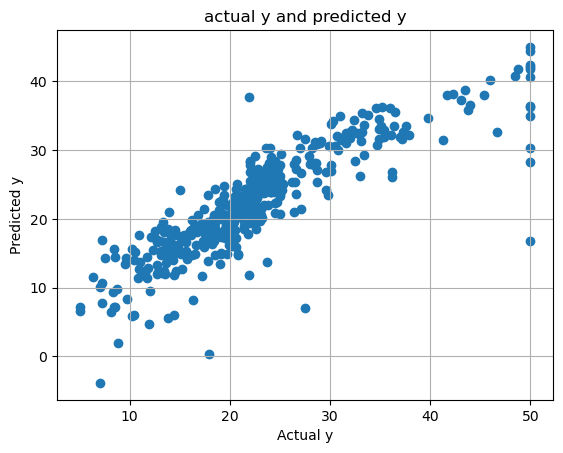

Squared Error : 38.59758448375493


In [27]:
#change early stopping value 
model = SGDRegressor(early_stopping=True)
model.fit(x_train, y_train)
plt.scatter(y_train, model.predict(x_train))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('actual y and predicted y')
plt.show()
print('Squared Error :', mean_squared_error(y_test, model.predict(x_test)))


#terminate training when validation score is not improving 
#tol : when not none training will stop when loss >best-loss-tol , 

In [31]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True


=============== Loss Array ===============
[87.493074 18.936994 13.316475 12.221038 12.090279 11.894089 11.869683
 11.786581 11.758161 11.774416 11.724177 11.69807  11.668531 11.658761
 11.633526 11.635864 11.553479 11.623452 11.602323 11.57705  11.592752
 11.555943]


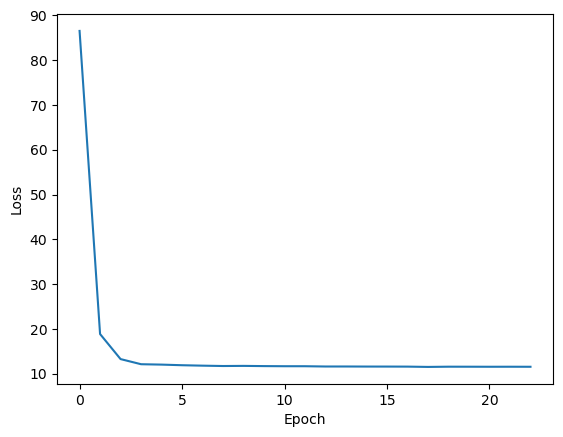

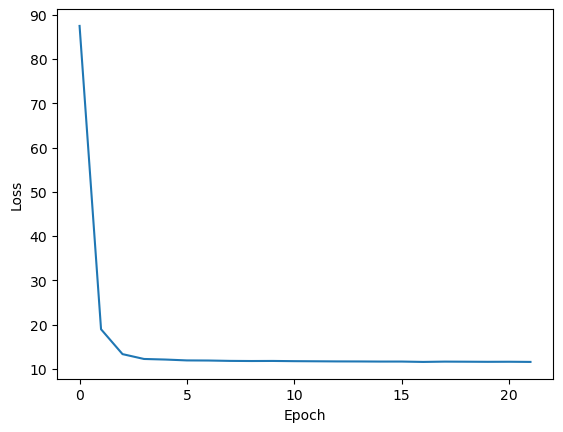

In [32]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(verbose=1)

with DisplayLossCurve():
  model.fit(X, Y)

# OR

with DisplayLossCurve(print_loss=True):
  model.fit(X, Y)

/home/chaima/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/chaima/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


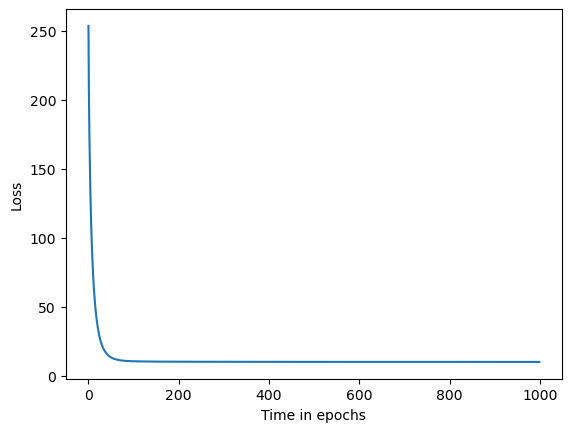

In [46]:

#verbose when 1 displays nbr of iterations , epochs and the loss(text), mystdout recupere test te3 output and for every text tdir split , trecupiri ligne par ligne,
#tahkm la var li mora loss w tconcatiniha l la lisst te3 lost
#hna bech jbna loss history
import sys
sgdr = SGDRegressor(verbose=1,max_iter=1000,learning_rate='invscaling', eta0=0.001,tol=1000, n_iter_no_change=1000)
sgdr.fit(x_train,y_train)
sys.stdout = mystdout = StringIO()
sgdr.fit(x_train,y_train)
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if( len(line.split("loss: ")) ==1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
np.arange(len(loss_list)),loss_list
plt.figure()
plt.plot(np.arange(len(loss_list)),loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()